In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('max_colwidth',400)
import matplotlib.pyplot as plt
import json
import pickle


In [2]:
#test get business data
biz_f = open('../input/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [3]:
biz_df=biz_df.dropna()

In [4]:
biz_df.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'NoiseLevel': 'u'loud'', 'RestaurantsTableService': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRang...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'Wednesday': '9:0-0:0', 'Thursday': '9:0-0:0', 'Friday': '9:0-1:0', 'Saturday': '9:0-1:0', 'Sunday': '9:0-0:0'}",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'average'', 'RestaurantsDelivery': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}', 'Alcohol': 'u'beer_and_wine'', 'Caters': 'False', 'WiFi': 'u'no'', 'RestaurantsTakeOut': 'True', 'BusinessAcceptsCreditCards': 'True', 'Ambience': '{'romantic': False, 'intimate': False, ...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-21:30', 'Thursday': '17:30-21:30', 'Friday': '17:30-22:0', 'Saturday': '17:30-22:0', 'Sunday': '17:30-21:0'}",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppointmentOnly': 'True', 'BusinessAcceptsCreditCards': 'True'}",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Services, Kitchen & Bath, Home & Garden, Water Heater Installation/Repair",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', 'Wednesday': '7:0-23:0', 'Thursday': '7:0-23:0', 'Friday': '7:0-23:0', 'Saturday': '7:0-23:0', 'Sunday': '7:0-23:0'}",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
restaurant = biz_df[biz_df.apply(lambda x: 'Restaurants' in x['categories'], axis=1)]

In [6]:
restaurant.shape

(44100, 14)

In [7]:
# Load Yelp reviews data
review_file = open('../input/yelp_academic_dataset_review.json')
review_df = pd.DataFrame([json.loads(next(review_file)) for x in range(biz_df.shape[0])])
review_file.close()

In [8]:
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,"I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon! I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level! \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit. Next comes the most relaxing and i...",0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,"I have to say that this office really has it together, they are so organized and friendly! Dr. J. Phillipp is a great dentist, very friendly and professional. The dental assistants that helped in my procedure were amazing, Jewel and Bailey helped me to feel comfortable! I don't have dental insurance, but they have this insurance through their office you can purchase for $80 something a year...",3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,"Went in for a lunch. Steak sandwich was delicious, and the Caesar salad had an absolutely delicious dressing, with a perfect amount of dressing, and distributed perfectly across each leaf. I know I'm going on about the salad ... But it was perfect.\n\nDrink prices were pretty good.\n\nThe Server, Dawn, was friendly and accommodating. Very happy with her.\n\nIn summation, a great pub experience...",0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,"Today was my second out of three sessions I had paid for. Although my first session went well, I could tell Meredith had a particular enjoyment for her male clients over her female. However, I returned because she did my teeth fine and I was pleased with the results. When I went in today, I was in the whitening room with three other gentlemen. My appointment started out well, although, being a...",7,ssoyf2_x0EQMed6fgHeMyQ


In [9]:
#only use 2 years data
review_df=review_df[review_df.date>='2017-01-01']

In [10]:
review_df.shape

(45949, 9)

In [11]:
#join dataframe
restaurant_reviews = restaurant.merge(review_df, on='business_id', how='inner')

In [12]:
r_reviews=restaurant_reviews[['categories','text']]

In [13]:
r_reviews.shape

(27206, 2)

In [14]:
r_reviews.groupby('categories').size().reset_index(name='count').sort_values('count', ascending=False)

,categories,count
1402,"Restaurants, American (New), Southern",420
1169,"Mexican, Restaurants",310
1998,"Sandwiches, Restaurants, Breakfast & Brunch",294
310,"Breakfast & Brunch, American (Traditional), African, Restaurants, Bars, Pubs, Burgers, Nightlife, American (New)",231
1253,"Nightlife, Lounges, Restaurants, Bars, American (Traditional), Breakfast & Brunch",204
545,"Chinese, Restaurants",197
204,"Barbeque, Restaurants",197
1750,"Restaurants, Mexican",183
1548,"Restaurants, Chinese",179
18,"American (New), Buffets, Restaurants",171


#data cleasning

In [15]:
import re
import string

In [16]:
def clean_text_round1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text
round1=lambda x: clean_text_round1(x)

In [17]:
r_reviews['text']=r_reviews.text.apply(round1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
def clean_text_round2(text):
    text=re.sub('[^A-Za-z0-9]+', ' ',text)
    return text

round2= lambda x: clean_text_round2(x)

In [19]:
r_reviews['text']=r_reviews.text.apply(round2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
r_reviews.text.head()

0    my girlfriend and i went for dinner at emerald chinese after a thursday night workout we arrived around and were seated after a short wait after browsing the menu and a brief discussion with our waiter we ordered seafood noodles and a item mix meat plate bbq pork chicken and duck the food came soon thereafter and it was hot and delicious there was large portions and lots of seafood in the seaf...
1                     i went at on a monday it was dimsum i hated every second i was there the carts were going around but the ladies kept ignoring us and i dont understand why we got gar how a spinach dumpling after that not a single cart were go by and we sat for so long till i finally i gave up we went to pay and it was which is soooo high for what we got ill never ever go back food was good though
2                                                                                                                                                                           the dimsum here is

#approach1: bag of words

In [21]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import *

In [22]:
text1 = " ".join(log for log in r_reviews.text)

In [23]:
stopwords=gensim.parsing.preprocessing.STOPWORDS

In [24]:
#exploring dataset
from wordcloud import WordCloud
#use default stopwords
wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'word cloud')

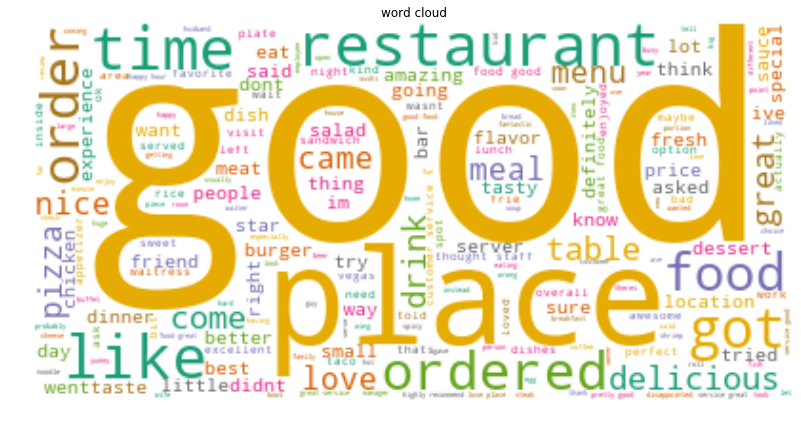

In [25]:
wordcloud =wc.generate(text1)
plt.rcParams['figure.figsize'] = [16, 7]
plt.imshow(wordcloud, interpolation='bilinear')    
plt.subplot(1,1,1)
plt.axis("off")
plt.title('word cloud')

In [26]:
#further clean with stop words
r_reviews.text = r_reviews.text.apply(lambda x:' '.join(x for x in x.split() if not x in stopwords))

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
#approach 1: using Doc2vec+k-means clustering
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [28]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in r_reviews['text'].values:
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print('Number of texts processed: ', j)

Number of texts processed:  27206


In [29]:
model = Doc2Vec(vector_size=100, dbow_words= 1, dm=0, epochs=1,  window=5, seed=42, min_count=5, workers=40,alpha=0.025, min_alpha=0.025)

In [30]:
model.build_vocab(all_content_train)

In [31]:
count = len(r_reviews)
for epoch in range(10):
    if epoch%5 == 0:
        print("epoch "+str(epoch))
    model.train(all_content_train, total_examples=count, epochs=1)
    model.save('doc2vec.model')
    if epoch%5 == 0:
        model.alpha -= 0.002  # decrease the learning rate
        model.min_alpha = model.alpha 

epoch 0
epoch 5


In [32]:
fname = "doc2vec.model"
model = Doc2Vec.load(fname)

In [33]:
from sklearn.cluster import KMeans

In [34]:
#elbow evealuate
test1=np.arange(start=2,stop=30,step=2)
clustering_1=pd.DataFrame()
for t in test1:
    kmeans=KMeans(n_clusters=t,random_state=42)
    kmeans.fit(model.docvecs.vectors_docs)
    df_temp=pd.DataFrame({'clusters':[t],'sse':[kmeans.inertia_]})
    clustering_1=clustering_1.append(df_temp)

Text(0.5, 1.0, 'clustering group')

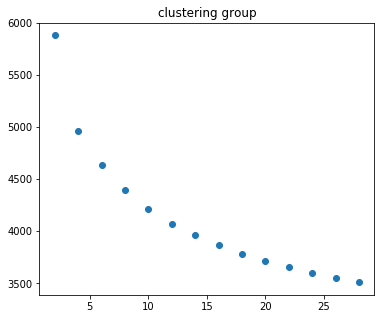

In [35]:
#plot results
plt.figure(figsize=(6,5))
plt.scatter(clustering_1['clusters'],clustering_1['sse'])
plt.title('clustering group')

In [36]:
#test with 6 clusters
kmeans_model=KMeans(n_clusters=6, init='k-means++',max_iter=100)
kmeans_model.fit(model.docvecs.vectors_docs)
clusters = kmeans_model.labels_.tolist()

In [37]:
r_reviews['doc2vec_label']=clusters

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


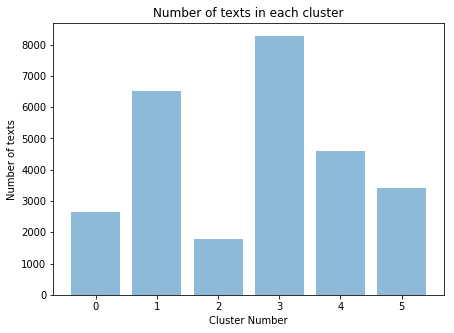

In [38]:
# test with stacked bar+ sub_category
plt.figure(figsize=(7,5))
plt.bar(range(0,6), [r_reviews['doc2vec_label'].value_counts()[i] for i in range(0, 6)], align='center', alpha=0.5)
plt.ylabel('Number of texts')
plt.xlabel('Cluster Number')
plt.title('Number of texts in each cluster')
plt.show()

In [39]:
#getting topic words---similarity
from collections import Counter
print('top terms per cluster:')
print()
order_centroids=kmeans_model.cluster_centers_.argsort()[:,::-1]
for i in range(0,6):
    titles=r_reviews[r_reviews['doc2vec_label']==i]
    words=[x for x in titles['text']]
    count = Counter(' '.join(words))
    count = Counter(' '.join(words).split(' '))
    s = ''
    print('Cluster '+str(i)+' words:')

    for i in  count.most_common()[:20]:
        s += i[0]+" "
    print(s+'\n')

top terms per cluster:

Cluster 0 words:
food good place great like service time chicken restaurant ordered got order quality came delicious menu try best nice definitely 

Cluster 1 words:
food good great place service time chicken like best delicious love friendly staff restaurant nice definitely ordered try order got 

Cluster 2 words:
food like good place time restaurant ordered service chicken came order great menu got didnt table sauce said dont im 

Cluster 3 words:
food great good place service time delicious best like love friendly staff chicken definitely nice amazing restaurant come ordered try 

Cluster 4 words:
food good place service great like time ordered order came chicken got restaurant dont menu nice try didnt delicious im 

Cluster 5 words:
pizza food amazing good place great service time like ordered best delicious got order love definitely chicken try nice restaurant 



In [40]:
#visualize with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(model.docvecs.vectors_docs)

In [41]:
datapoint=pca.transform(model.docvecs.vectors_docs)

In [42]:
label=kmeans_model.labels_

In [43]:
centroids=kmeans_model.cluster_centers_
centroidpoint=pca.transform(centroids)

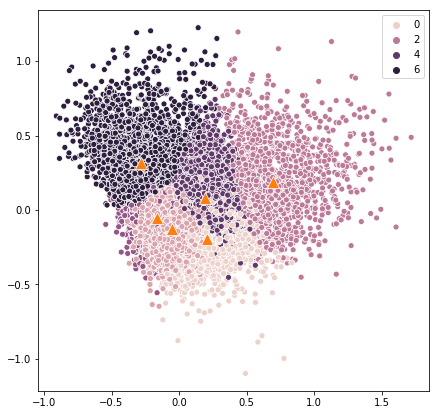

In [44]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.scatterplot(datapoint[:,0],datapoint[:,1],hue=label)
sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='^',s=150)

#Approach2: TF-IDF +kmeans

In [45]:
texts=r_reviews['text'].tolist()

In [46]:
stemmer = SnowballStemmer("english")
def tokenize_only(text):
    filtered_tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return filtered_tokens

In [47]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    filtered_tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [48]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in texts:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [49]:
vocab_frame = pd.DataFrame({'words': totalvocab_stemmed}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 1122807 items in vocab_frame


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=10, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

print(tfidf_matrix.shape)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 48.3 s, sys: 912 ms, total: 49.2 s
Wall time: 49.2 s
(27206, 18170)


In [51]:
terms = tfidf_vectorizer.get_feature_names()

In [52]:
num_clusters = 6
km = KMeans(n_jobs=-1, n_clusters=num_clusters, random_state = 42)
%time km.fit(tfidf_matrix)
TF_cluster = km.labels_.tolist()

CPU times: user 172 ms, sys: 352 ms, total: 524 ms
Wall time: 14min 47s


In [53]:
r_reviews['TF_cluster']=TF_cluster

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(6):
    print('Cluster '+str(i)+' words:')
    s = ""
    for ind in order_centroids[i, :40]:
        s+=str(vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0])+' '
    print(s)
    print( )

Top terms per cluster:

Cluster 0 words:
great food servic place great great food friend good servic love time amaz staff great atmospher recommend definit price best come delici restaur drink awesom nice experi tri excel beer server spot menu high select food place famili bar enjoy 

Cluster 1 words:
chicken fri good order burger sauc like rice food noodl place tri tast soup dish flavor got delici salad time restaur great spici beef pork chees love meat come servic nice pretti thai came meal eat shrimp menu littl fri 

Cluster 2 words:
food place good love servic best amaz friend time delici like tri restaur nice come staff price definit recommend breakfast fresh menu ive eat excel sandwich order vega littl enjoy favorit great tast sushi locat dont im better drink look 

Cluster 3 words:
pizza crust order good place great time pizza like sauc tri chees best best love slice servic pepperoni wing salad pizza delici deliveri fresh great good friend dough food got custom littl order come 

In [55]:
r_reviews_c5=r_reviews.loc[r_reviews.TF_cluster==5].groupby('categories').size().reset_index(name='count').sort_values('count', ascending=False)
r_reviews_c5

,categories,count
1099,"Sandwiches, Restaurants, Breakfast & Brunch",85
123,"Barbeque, Restaurants",56
888,"Restaurants, Desserts, Salad, Food, Pizza, Burgers, American (Traditional)",54
654,"Mexican, Restaurants",46
194,"Breakfast & Brunch, American (Traditional), African, Restaurants, Bars, Pubs, Burgers, Nightlife, American (New)",44
537,"Gastropubs, Nightlife, Restaurants, American (New), Bars, Sports Bars",41
408,"Event Planning & Services, Party & Event Planning, American (New), Nightlife, Active Life, Golf, Restaurants, Bars, Sports Bars",39
1180,"Steakhouses, Restaurants",38
701,"Nightlife, Lounges, Restaurants, Bars, American (Traditional), Breakfast & Brunch",34
968,"Restaurants, Mexican",32


In [56]:
#Approach 3 bag of words--LDA

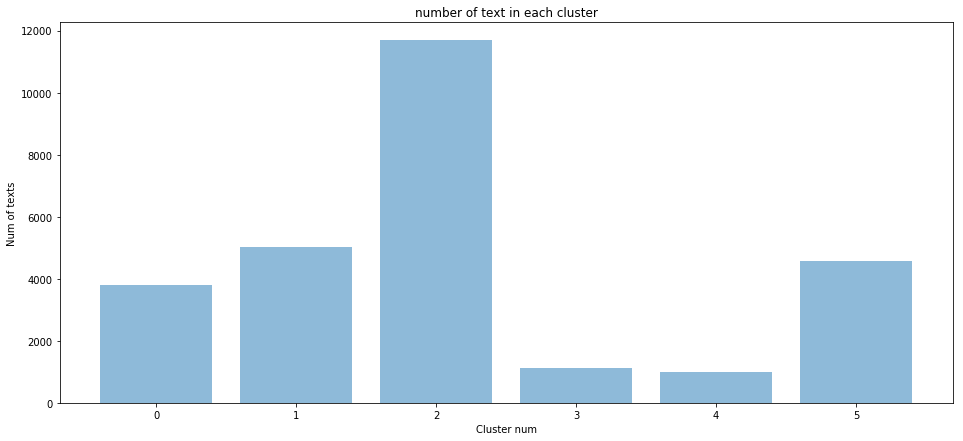

In [57]:
plt.bar(range(0,6),[r_reviews['TF_cluster'].value_counts()[i] for i in range(0,6)],align='center',alpha=0.5)
plt.ylabel('Num of texts')
plt.xlabel('Cluster num')
plt.title('number of text in each cluster')
plt.show()                     

In [58]:
tokenized_text=[tokenize_and_stem(text)for text in texts]
texts=[[word for word in text if word not in stopwords] for text in tokenized_text]

In [59]:
from gensim import corpora,models,similarities
dictionary=corpora.Dictionary(texts)

In [60]:
dictionary.filter_extremes(no_below=5,no_above=0.8)
corpus=[dictionary.doc2bow(text) for text in texts]

In [61]:
lda=models.LdaMulticore(corpus,num_topics=6,workers=40,id2word=dictionary,chunksize=10000,
                       passes=100)

In [62]:
for idx,topic in lda.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx,topic))

Topic: 0 Word: 0.025*"chicken" + 0.022*"good" + 0.017*"fri" + 0.017*"order" + 0.015*"like" + 0.013*"sauc" + 0.012*"food" + 0.011*"tast" + 0.010*"chees" + 0.009*"salad"
Topic: 1 Word: 0.033*"great" + 0.031*"food" + 0.020*"servic" + 0.017*"place" + 0.016*"friend" + 0.015*"delici" + 0.015*"good" + 0.014*"amaz" + 0.014*"love" + 0.010*"definit"
Topic: 2 Word: 0.024*"place" + 0.019*"food" + 0.015*"good" + 0.013*"pizza" + 0.013*"great" + 0.011*"like" + 0.011*"time" + 0.009*"bar" + 0.009*"servic" + 0.008*"locat"
Topic: 3 Word: 0.030*"order" + 0.020*"food" + 0.017*"time" + 0.016*"wait" + 0.014*"ask" + 0.012*"servic" + 0.011*"minut" + 0.011*"tabl" + 0.010*"came" + 0.009*"didnt"
Topic: 4 Word: 0.019*"place" + 0.019*"good" + 0.015*"food" + 0.015*"taco" + 0.012*"tri" + 0.012*"order" + 0.010*"rice" + 0.010*"like" + 0.009*"noodl" + 0.008*"roll"
Topic: 5 Word: 0.022*"coffe" + 0.019*"cream" + 0.018*"ice" + 0.018*"buffet" + 0.018*"breakfast" + 0.017*"egg" + 0.017*"sandwich" + 0.014*"dessert" + 0.013*"ca

In [63]:
#get result out
sent_topics_df = pd.DataFrame()
for i,row_list in enumerate(lda[corpus]):
    row=row_list[0] if lda.per_word_topics else row_list
    row=sorted(row,key=lambda x:(x[1]),reverse=True)
    for j,(topic_num,prop_topic) in enumerate(row):
        if j==0:
            wp=lda.show_topic(topic_num)
            topic_keywords=",".join([word for word,prop in wp])
            sent_topics_df=sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4),topic_keywords]),ignore_index=True)
        else: 
            break
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

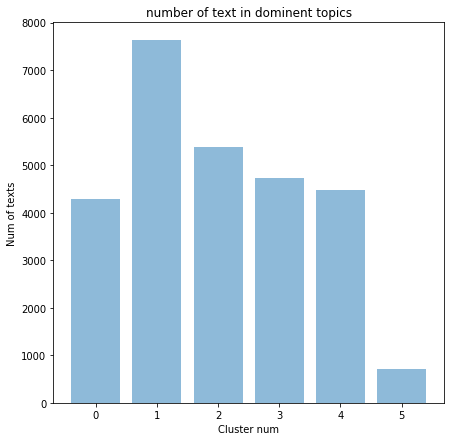

In [64]:
plt.figure(figsize=(7,7))
plt.bar(range(0,6),[sent_topics_df.Dominant_Topic.value_counts()[i] for i in range(0,6)],align='center',alpha=0.5)
plt.ylabel('Num of texts')
plt.xlabel('Cluster num')
plt.title('number of text in dominent topics')
plt.show()  

In [65]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [66]:
viz=pyLDAvis.gensim.prepare(lda,corpus,dictionary)
viz

/opt/conda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.130013  0.167507       1        1  21.582481
1     -0.037694 -0.074542       2        1  20.123875
2     -0.087484  0.057566       3        1  19.350594
0     -0.039618 -0.048741       4        1  18.038647
4     -0.031755 -0.154371       5        1  15.560362
5      0.326565  0.052582       6        1   5.344048, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
9     Default   6205.000000     chicken   6205.000000  30.0000  30.0000
370   Default  11658.000000       great  11658.000000  29.0000  29.0000
51    Default  13084.000000       order  13084.000000  28.0000  28.0000
520   Default   2419.000000        taco   2419.000000  27.0000  27.0000
797   Default   2607.000000    sandwich   2607.000000  26.0000  26.0000
457   Default   4495.000000         fri   4495.000000  25.0000  25.0000
884   Default   1915.000000   breakfast   1915.000000  24.0000  24.0000
1391  Default   1348.000000       coffe   1348.000000  23.0000  23.0000
223   Default   1984.000000         egg   1984.000000  22.0000  22.0000
19    Default   5030.000000      delici   5030.000000  21.0000  21.0000
411   Default   2817.000000       minut   2817.000000  20.0000  20.0000
655   Default   1207.000000       cream   1207.000000  19.0000  19.0000
249   Default   3767.000000         ask   3767.000000  18.0000  18.0000
65    Default   3597.000000        sauc   3597.000000  17.0000  17.0000
1540  Default   1247.000000         ice   1247.000000  16.0000  16.0000
525   Default   3271.000000       pizza   3271.000000  15.0000  15.0000
20    Default   1496.000000     dessert   1496.000000  14.0000  14.0000
2359  Default   1020.000000      buffet   1020.000000  13.0000  13.0000
495   Default   2211.000000        rice   2211.000000  12.0000  12.0000
580   Default   4166.000000        amaz   4166.000000  11.0000  11.0000
50    Default   1519.000000       noodl   1519.000000  10.0000  10.0000
544   Default    994.000000        cake    994.000000   9.0000   9.0000
238   Default   1574.000000        roll   1574.000000   8.0000   8.0000
80    Default   5377.000000        wait   5377.000000   7.0000   7.0000
572   Default   2818.000000       chees   2818.000000   6.0000   6.0000
348   Default   1478.000000       sushi   1478.000000   5.0000   5.0000
239   Default   2471.000000        said   2471.000000   4.0000   4.0000
505   Default   6026.000000        love   6026.000000   3.0000   3.0000
77    Default   4244.000000        tast   4244.000000   2.0000   2.0000
628   Default   1624.000000        told   1624.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
2818   Topic6     81.342934         une     82.169128   2.9191  -6.5551
1356   Topic6     77.172066          tr     77.998749   2.9185  -6.6078
2720   Topic6    127.487907     vanilla    128.915695   2.9180  -6.1058
1391   Topic6   1240.255493       coffe   1348.728394   2.8453  -3.8307
655    Topic6   1100.613892       cream   1207.875854   2.8362  -3.9502
14     Topic6    369.449005       cooki    403.039215   2.8422  -5.0418
1540   Topic6   1045.616577         ice   1247.785522   2.7524  -4.0014
2360   Topic6    468.131500          la    526.630920   2.8114  -4.8051
1561   Topic6    231.587570      banana    248.746765   2.8577  -5.5088
1949   Topic6    442.695801         pie    500.210022   2.8070  -4.8609
544    Topic6    759.672180        cake    994.602783   2.6597  -4.3209
1893   Topic6    153.799652     scrambl    166.775787   2.8482  -5.9182
779    Topic6    293.852448       fruit    368.513702   2.7028  -5.2707
884    Topic6   1004.023926   breakfast   1915.177490   2.2834  -4.0420
223    Topic6   1000.201721         egg   1984.398926   2.2441  -4.0458
1504   Topic6    477.833313       toast    758.001770   2.4678  -4.78

In [67]:
pyLDAvis.save_html(viz, 'lda.html')